In [ ]:
pip install --upgrade tensorflow

In [1]:
import tensorflow as tf
print(tf.__version__)

2.6.0


In [ ]:
#Load the data
from sklearn.datasets import load_breast_cancer

In [ ]:
data = load_breast_cancer()

In [ ]:
type(data)

sklearn.utils.Bunch

In [ ]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
data.data.shape

(569, 30)

In [ ]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
data.target.shape

(569,)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D = X_train.shape

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Now all the fun Tensorflow stuff
# Build the model

model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(D,)),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Alternatively, you can do:
# model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Dense(1, input_shape=(D,), activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


# Train the model
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)


# Evaluate the model - evaluate() returns loss and accuracy
print("Train score:", model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))

Epoch 1/100
12/12 [==============================] - 1s 15ms/step - loss: 0.6330 - accuracy: 0.6194 - val_loss: 0.5462 - val_accuracy: 0.7074
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 0.5741 - accuracy: 0.7113 - val_loss: 0.4953 - val_accuracy: 0.7872
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: 0.5241 - accuracy: 0.7428 - val_loss: 0.4524 - val_accuracy: 0.8138
Epoch 4/100
12/12 [==============================] - 0s 3ms/step - loss: 0.4821 - accuracy: 0.7822 - val_loss: 0.4164 - val_accuracy: 0.8298
Epoch 5/100
12/12 [==============================] - 0s 4ms/step - loss: 0.4465 - accuracy: 0.8110 - val_loss: 0.3863 - val_accuracy: 0.8457
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: 0.4161 - accuracy: 0.8399 - val_loss: 0.3613 - val_accuracy: 0.8511
Epoch 7/100
12/12 [==============================] - 0s 5ms/step - loss: 0.3898 - accuracy: 0.8661 - val_loss: 0.3406 - val_accuracy: 0.8723
Epoch 8/100


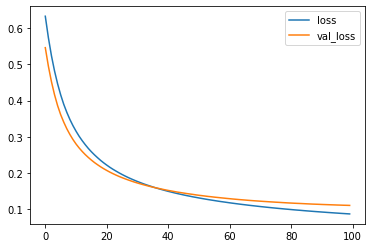

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

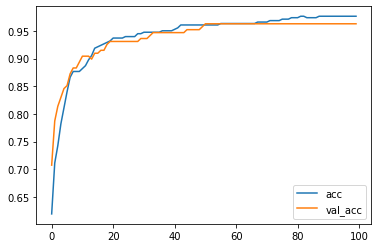

In [ ]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

#Part 2: Making Predictions

In [ ]:
P = model.predict(X_test)
print(P)

[[9.95849371e-01]
 [9.56869364e-01]
 [9.48585987e-01]
 [9.85765636e-01]
 [9.97643828e-01]
 [4.73945439e-02]
 [6.18464351e-01]
 [9.87826049e-01]
 [4.71866230e-07]
 [9.83177304e-01]
 [8.98407638e-01]
 [9.98869717e-01]
 [3.27756912e-01]
 [9.78102565e-01]
 [4.47952747e-03]
 [9.28671062e-02]
 [9.98946548e-01]
 [9.55293119e-01]
 [9.96756494e-01]
 [9.91604924e-01]
 [9.85230446e-01]
 [9.98419166e-01]
 [9.99303699e-01]
 [9.32802796e-01]
 [1.26411021e-02]
 [8.82752478e-01]
 [5.88118672e-01]
 [9.87654448e-01]
 [9.97187972e-01]
 [7.18636102e-06]
 [8.53309155e-01]
 [9.17104721e-01]
 [2.91806459e-02]
 [9.11307335e-01]
 [1.74513459e-03]
 [9.97851014e-01]
 [9.99602914e-01]
 [9.97041285e-01]
 [9.99162138e-01]
 [5.94532412e-06]
 [3.08639824e-01]
 [9.93455768e-01]
 [6.35613501e-02]
 [4.43421096e-01]
 [9.48500812e-01]
 [9.96520519e-01]
 [9.76001263e-01]
 [3.14275622e-02]
 [9.83079016e-01]
 [1.28183007e-01]
 [2.37555787e-06]
 [9.84906077e-01]
 [9.98407602e-01]
 [9.35786486e-01]
 [1.89036131e-04]
 [9.937123

In [ ]:
import numpy as np
P = np.round(P).flatten()
print(P)

[1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0.
 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0.
 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1.
 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1.
 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1.
 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1.
 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1.]


In [ ]:
# Calculate the accuracy, compare it to evaluate() output
print("Manually calculated accuracy:", np.mean(P == y_test))
print("Evaluate output:", model.evaluate(X_test, y_test))

Manually calculated accuracy: 0.9627659574468085
6/6 [==============================] - 0s 2ms/step - loss: 0.1106 - accuracy: 0.9628
Evaluate output: [0.11062528938055038, 0.9627659320831299]


In [ ]:
model.save('linearclassifier.h5')

In [ ]:
!ls -lh

total 24K
-rw-r--r-- 1 root root  19K Sep 27 16:36 linearclassifier.h5
drwxr-xr-x 1 root root 4.0K Sep 16 13:40 sample_data


In [ ]:
model = tf.keras.models.load_model('linearclassifier.h5')
print(model.layers)
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.1106 - accuracy: 0.9628


[0.11062528938055038, 0.9627659320831299]